# Detecting Stock Market Crashes

In [1]:
# data source
import yfinance as yf

# utils
from fermat_utils import *
from dynamical_systems_utils import *
from ripser import Rips

Here we use the yfinance library to download historical market data from Yahoo! Finance. Let's grab the S&P 500 index and inspect the first rows.

In [2]:
SP500 = yf.Ticker("^GSPC")
sp500_df = SP500.history(period="max")
sp500_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0,0


In [3]:
sp500_df.shape

(23346, 7)



We are interested in the Close price values.

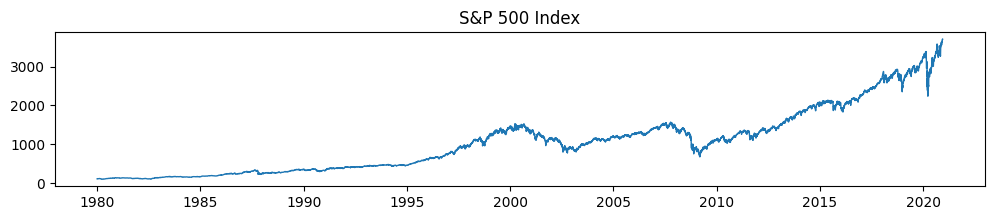

In [42]:
price_df = sp500_df['Close']

plt.figure(figsize=(12,2))

# start in 1980
start_year = '1980'
# use pad to replace missing values by last non-missing value
price = price_df.resample('24H').pad()[start_year:]
plt.plot(price,lw=1)
plt.title('S&P 500 Index')
plt.show()

#### Time series as point clouds: Takens' embedding Theorem

Delay embedding is a geometrical technique of encoding a time-evolving process based on the idea that some key properties of the dynamics (including, but more general than, periodicity or quasi-periodicity) can be unveiled very effectively in higher dimensions. It represents a univariate time series (or a single temporal window over that time series) as a point cloud, i.e. a set of vectors in a Euclidean space of arbitrary dimension.

The procedure works as follows: given a time series $y(t)$ two integers $D$ (the embedding dimension) and $T$ (the time delay parameter), for any time $t_i \in (t_0, t_1, \ldots )$, collect the values of the variable $y$ at $D$ distinct times, evenly spaced by $T$ and starting at $t_i$, to construct $$Y_{t_i} = (y_{t_i}, y_{t_i + T}, \ldots , y_{t_i + (D-1)T}).$$

This time-delay embedding technique is also called Takens' embedding after Floris Takens, who demonstrated its significance with a celebrated theorem in the context of nonlinear dynamical systems.


### Covid crisis 2019-2020

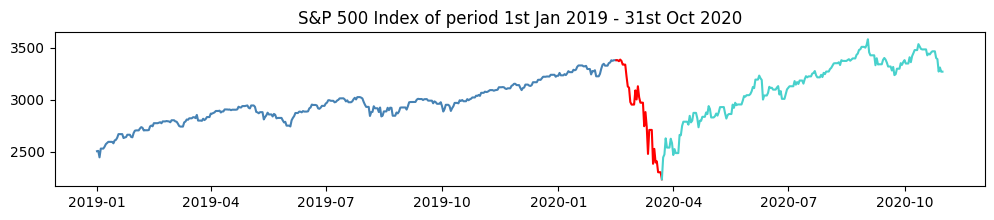

In [48]:
plt.figure(figsize=(12,2))
t0 = '2019-01-01'
t1 = '2020-02-16'
t2 = '2020-03-23'
t3 = '2020-10-31'
plt.plot(price[t0:t1], color = 'steelblue')
plt.plot(price[t1:t2], color = 'red')
plt.plot(price[t2:t3], color = 'mediumturquoise')
plt.title('S&P 500 Index of period 1st Jan 2019 - 31st Oct 2020')
plt.show()

In [6]:
T=7
d=3
X1 = delay_embedding(price[t0:t1], T, d)
X2 = delay_embedding(price['2020-02-04':'2020-04-06'], T, d)
X3 = delay_embedding(price[t2:t3], T, d)

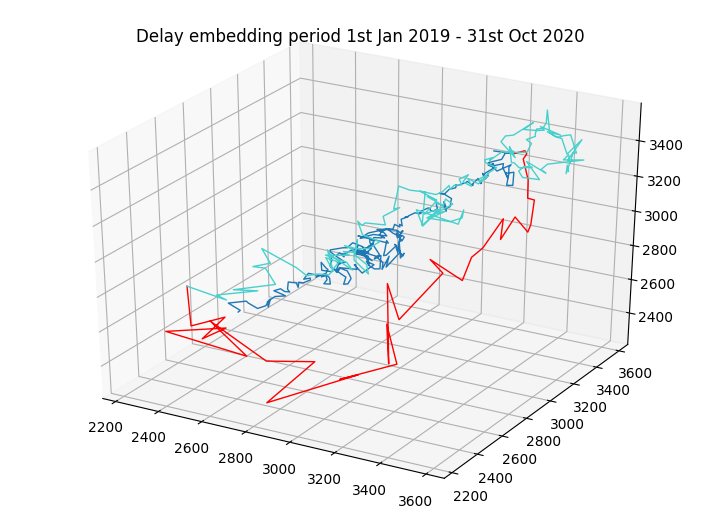

In [30]:
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.plot(X1[0], X1[1], X1[2], linewidth=1)
ax.plot(X2[0], X2[1], X2[2], color = 'red', linewidth=1)
ax.plot(X3[0], X3[1], X3[2], color = 'mediumturquoise', linewidth=1)
plt.title('Delay embedding period 1st Jan 2019 - 31st Oct 2020')
plt.show()

#### Before crisis

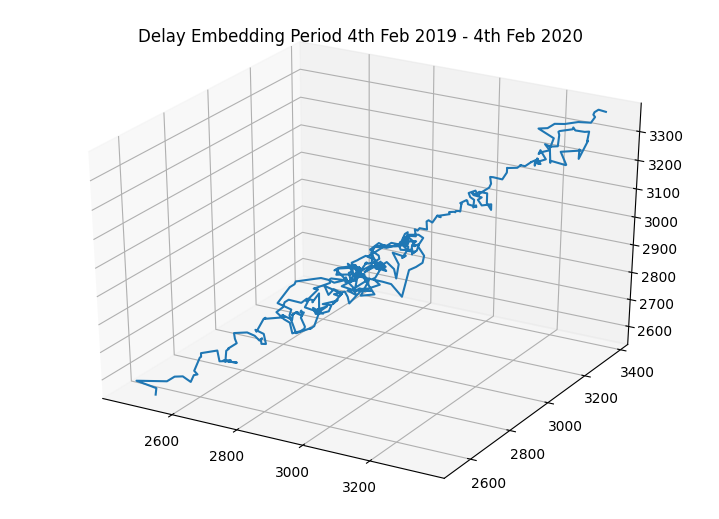

In [54]:
T=3
d=3
X0 = delay_embedding(price[t0:t1], T, d)
embedding0 = np.column_stack((X0[0], X0[1], X0[2]))
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.plot(X0[0], X0[1], X0[2])
plt.title('Delay Embedding Period 4th Feb 2019 - 4th Feb 2020')
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


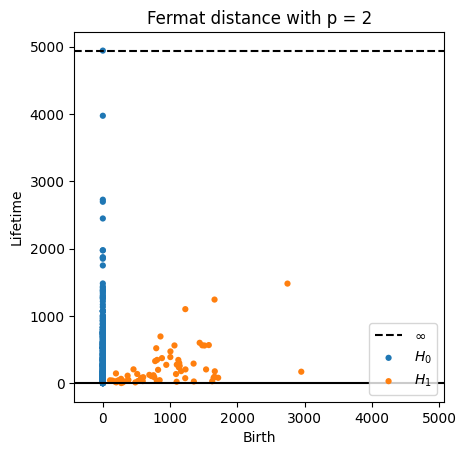

In [97]:
dgm0 = Fermat_dgm(embedding0, 2)

#### After crisis

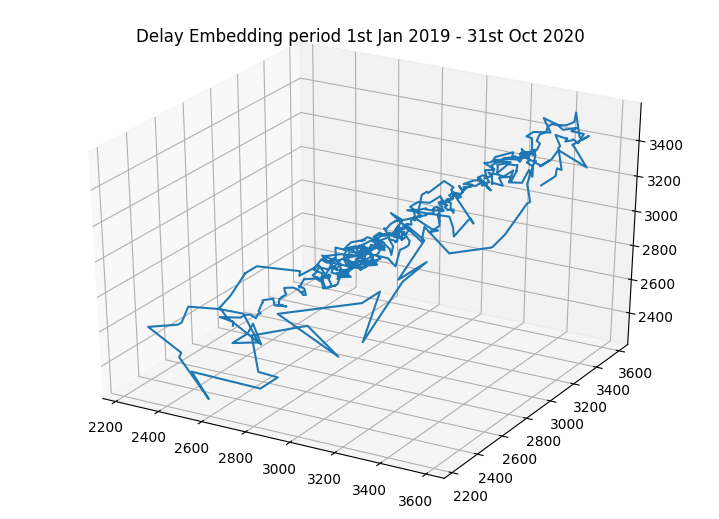

In [55]:
Y = delay_embedding(price[t0:t3], T, d)
embedding1 = np.column_stack((Y[0], Y[1], Y[2]))
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.plot(Y[0], Y[1], Y[2])
plt.title('Delay Embedding period 1st Jan 2019 - 31st Oct 2020')
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


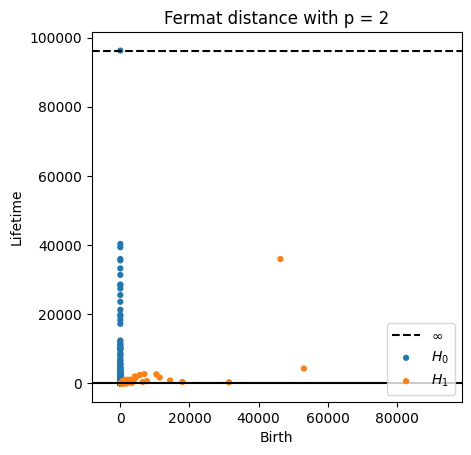

In [18]:
dgm1 = Fermat_dgm(embedding1, 2)

## Other crisis detection

### Black Monday crash

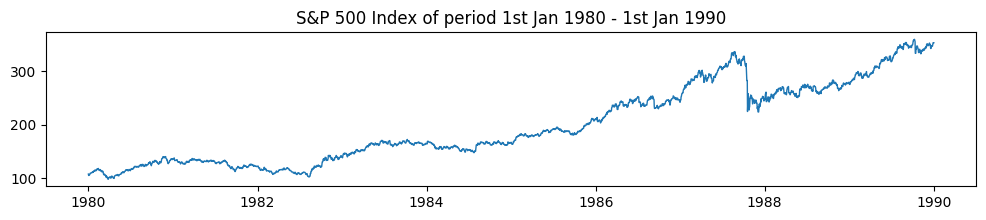

In [56]:
plt.figure(figsize=(12,2))
plt.plot(price['1980-01-01':'1990-01-01'], lw=1)
plt.title('S&P 500 Index of period 1st Jan 1980 - 1st Jan 1990')
plt.show()

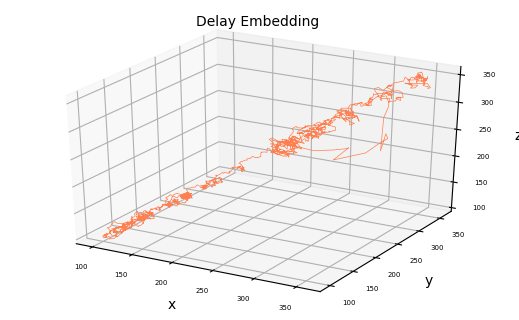

In [21]:
X = delay_embedding(price['1980-01-01':'1990-01-01'], 10, 3, 2)
plot_trajectories(X[0], X[1], X[2], 'Delay Embedding ', 'line')

In [22]:
embedding = np.column_stack((X[0], X[1], X[2]))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Fermat distance p=2')

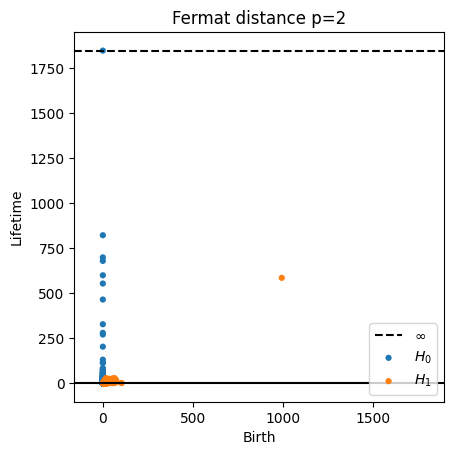

In [23]:
fermat_distances = compute_fermat_distance(embedding, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('Fermat distance p=2')

### Financial crisis (2007–2008)

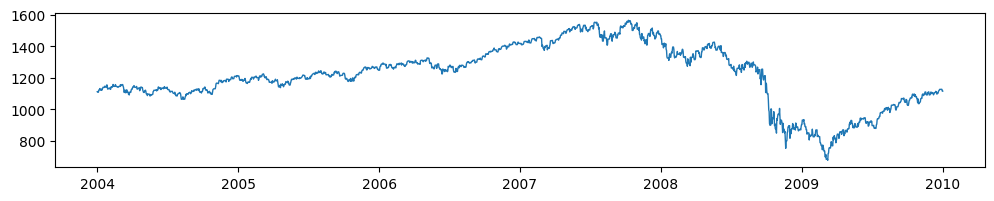

In [46]:
plt.figure(figsize=(12,2))

plt.plot(price['2004-01-01':'2010-01-01'], lw=1)
plt.show()

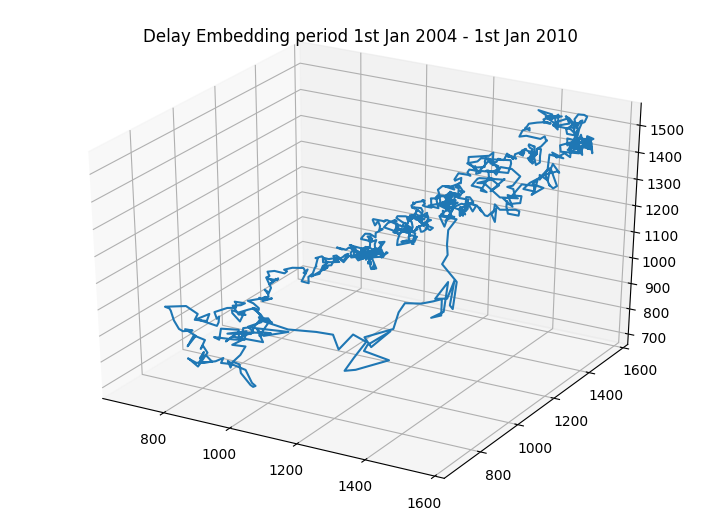

In [57]:
X = delay_embedding(price['2004-01-01':'2010-01-01'], 30, 3, 2)
embedding = np.column_stack((X[0], X[1], X[2]))
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.plot(X[0], X[1], X[2])
plt.title('Delay Embedding period 1st Jan 2004 - 1st Jan 2010')
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 6.5 s, sys: 55 ms, total: 6.56 s
Wall time: 6.55 s


Text(0.5, 1.0, 'Fermat distance p=2')

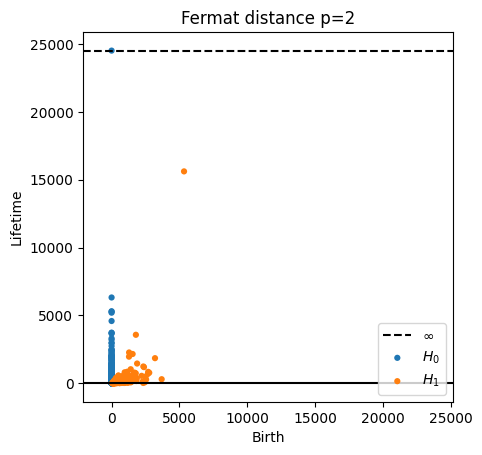

In [27]:
%%time
fermat_distances = compute_fermat_distance(embedding, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('Fermat distance p=2')